<a href="https://colab.research.google.com/github/namakula-josephine/Artificial_intelligence_assignment/blob/main/Copy_of_CNN_refined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the required libraries
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
#defining  important the attributes
IMAGE_SIZE=250
CHANNELS=3
BATCH_SIZE=32
EPOCHS=35
dataset_zip_path = '/content/drive/MyDrive/Dataset/Potato_Dataset.zip'  # Path to the zip file

In [ ]:

# Check if the file exists
if not os.path.exists(dataset_zip_path):
    print(f"Error: File not found at {dataset_zip_path}")
else:
    print(f"File found: {dataset_zip_path}")

File found: /content/drive/MyDrive/Dataset/Potato_Dataset.zip


In [ ]:
import zipfile
import tempfile
import os

# Extract the zip file to a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    print(f"📂 Extracting to: {temp_dir}")

    try:
        with zipfile.ZipFile("/content/drive/MyDrive/Dataset/Potato_Dataset.zip", 'r') as zip_ref:
            zip_ref.extractall(temp_dir)  # Extracting files

        dataset = temp_dir  # Assign extracted directory

        # Check if extraction was successful
        extracted_items = os.listdir(dataset)
        if extracted_items:
            print("✅ Extraction successful! Contents:")
        else:
            print("⚠️ Extraction complete, but no files found.")

        # Print structure of extracted dataset
        for root, dirs, files in os.walk(dataset):
            print(f"📂 Directory: {root}")
            for d in dirs:
                print(f"  📁 Sub-directory: {d}")
            for f in files:
                print(f"  🖼️ File: {f}")

    except zipfile.BadZipFile:
        print("❌ ERROR: Corrupted ZIP file!")

    except Exception as e:
        print(f"❌ ERROR: {e}")


📂 Extracting to: /tmp/tmpnz6vrmct
✅ Extraction successful! Contents:
📂 Directory: /tmp/tmpnz6vrmct
  📁 Sub-directory: Potato_Dataset
📂 Directory: /tmp/tmpnz6vrmct/Potato_Dataset
  📁 Sub-directory: Late Blight
  📁 Sub-directory: Healthy
  📁 Sub-directory: Early Blight
📂 Directory: /tmp/tmpnz6vrmct/Potato_Dataset/Late Blight
  🖼️ File: Late_Blight (874).jpg
  🖼️ File: Late_Blight (767).jpg
  🖼️ File: Late_Blight (436).jpg
  🖼️ File: Late_Blight (811).jpg
  🖼️ File: Late_Blight (748).jpg
  🖼️ File: Late_Blight (711).jpg
  🖼️ File: Late_Blight (325).JPG
  🖼️ File: Late_Blight (50).JPG
  🖼️ File: Late_Blight (40).JPG
  🖼️ File: Late_Blight (860).jpg
  🖼️ File: Late_Blight (570).jpg
  🖼️ File: Late_Blight (909).jpg
  🖼️ File: Late_Blight (503).jpg
  🖼️ File: Late_Blight (373).jpg
  🖼️ File: Late_Blight (906).jpg
  🖼️ File: Late_Blight (66).JPG
  🖼️ File: Late_Blight (235).JPG
  🖼️ File: Late_Blight (402).jpg
  🖼️ File: Late_Blight (895).jpg
  🖼️ File: Late_Blight (322).JPG
  🖼️ File: Late_Bl

In [ ]:
import os

# Check if the ZIP file exists
dataset_zip_path = "/content/drive/MyDrive/Dataset/Potato_Dataset.zip"

if os.path.exists(dataset_zip_path):
    print(f"✅ File found: {dataset_zip_path}")
else:
    print(f"❌ ERROR: File not found at {dataset_zip_path}")


✅ File found: /content/drive/MyDrive/Dataset/Potato_Dataset.zip


📂 Extracting dataset to: /tmp/tmpeeiiwl1n
✅ Dataset directory found: /tmp/tmpeeiiwl1n/Potato_Dataset
Found 3000 files belonging to 3 classes.
📌 Classes found: ['Early Blight', 'Healthy', 'Late Blight']


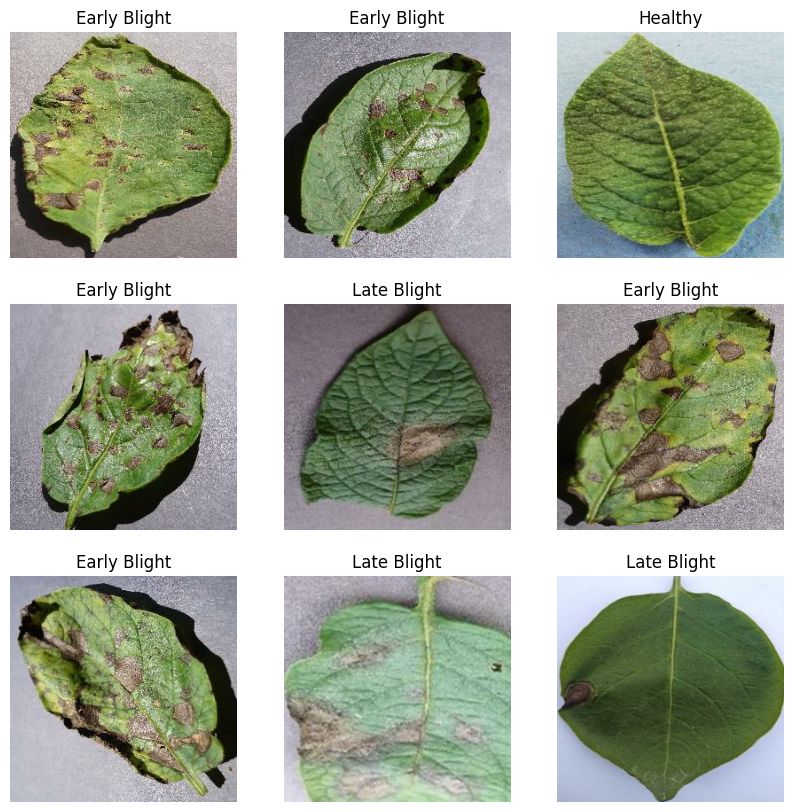

In [ ]:
import tensorflow as tf
import zipfile
import os
import tempfile

# Define image size and batch size
IMAGE_SIZE = 256  # Modify as needed
BATCH_SIZE = 32    # Modify as needed

# Path to the ZIP file
dataset_zip_path = "/content/drive/MyDrive/Dataset/Potato_Dataset.zip"

# Extract the ZIP file to a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    print(f"📂 Extracting dataset to: {temp_dir}")

    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)

    # Find the correct extracted directory (some datasets have a root folder inside ZIP)
    extracted_folders = [os.path.join(temp_dir, d) for d in os.listdir(temp_dir) if os.path.isdir(os.path.join(temp_dir, d))]

    if len(extracted_folders) == 1:
        dataset_dir = extracted_folders[0]  # Use the first (or only) extracted folder
    else:
        dataset_dir = temp_dir  # Use temp_dir if images are directly extracted

    print(f"✅ Dataset directory found: {dataset_dir}")

    # Load dataset using Keras
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_dir,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )

    # Check class names
    class_names = dataset.class_names
    print(f"📌 Classes found: {class_names}")

    # Display a batch of images
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):  # Show first 9 images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()


📂 Extracting dataset to: /tmp/tmpo59g811m
✅ Dataset directory found: /tmp/tmpo59g811m/Potato_Dataset
Found 3000 files belonging to 3 classes.
📌 Classes found: ['Early Blight', 'Healthy', 'Late Blight']


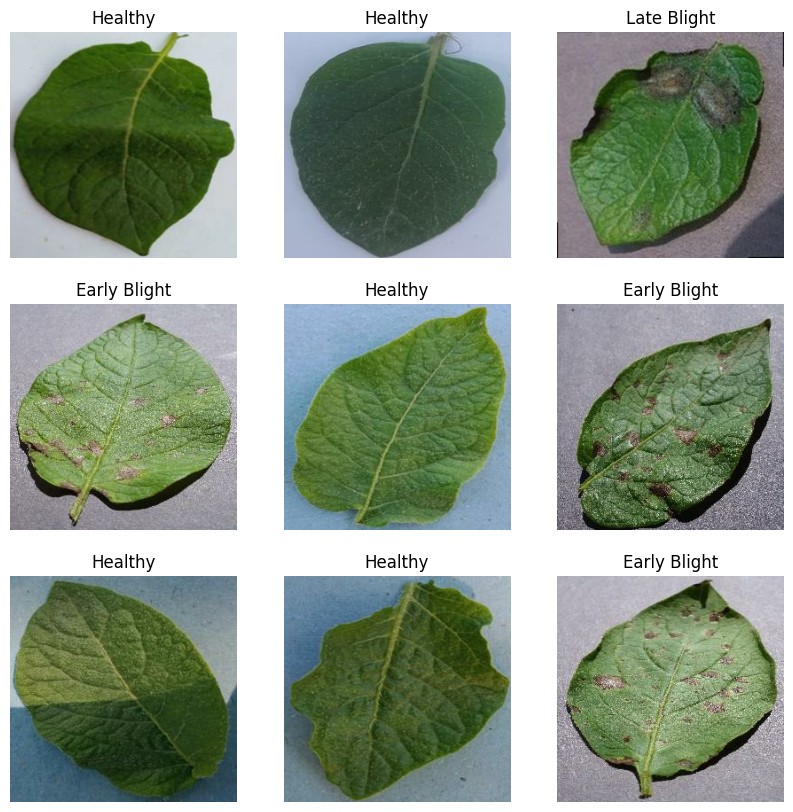

In [ ]:
import tensorflow as tf
import zipfile
import os
import tempfile
import matplotlib.pyplot as plt

# Define image size and batch size
IMAGE_SIZE = 256  # Modify as needed
BATCH_SIZE = 32   # Modify as needed

# Path to the ZIP file (Ensure Google Drive is mounted)
dataset_zip_path = "/content/drive/MyDrive/Dataset/Potato_Dataset.zip"

# Extract the ZIP file to a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    print(f"📂 Extracting dataset to: {temp_dir}")

    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_dir)  # Extract ZIP file

    # Find the actual dataset directory inside temp_dir
    extracted_folders = [os.path.join(temp_dir, d) for d in os.listdir(temp_dir) if os.path.isdir(os.path.join(temp_dir, d))]

    if len(extracted_folders) == 1:
        dataset_dir = extracted_folders[0]  # If there's a single folder, use it
    else:
        dataset_dir = temp_dir  # Use temp_dir if images are directly extracted

    print(f"✅ Dataset directory found: {dataset_dir}")

    # Load dataset using Keras
    potato_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_dir,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )

    # Get class names
    potato_classes = potato_dataset.class_names
    print(f"📌 Classes found: {potato_classes}")

    # Display a batch of images
    plt.figure(figsize=(10, 10))
    for images, labels in potato_dataset.take(1):
        for i in range(9):  # Show first 9 images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(potato_classes[labels[i]])
            plt.axis("off")
    plt.show()


In [ ]:
import zipfile
import tempfile
import os
import tensorflow as tf

# Path to ZIP file in Google Drive
dataset_zip_path = "/content/drive/MyDrive/Dataset/Potato_Dataset.zip"

# Extract ZIP to a **permanent** directory
extracted_dir = "/content/extracted_potato_dataset"

if not os.path.exists(extracted_dir):  # Avoid re-extracting if already done
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)

# Identify correct dataset directory
extracted_folders = [os.path.join(extracted_dir, d) for d in os.listdir(extracted_dir) if os.path.isdir(os.path.join(extracted_dir, d))]
dataset_dir = extracted_folders[0] if len(extracted_folders) == 1 else extracted_dir

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

# ✅ Now this will work because the dataset folder still exists
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)


Found 3000 files belonging to 3 classes.
(256, 256, 3)


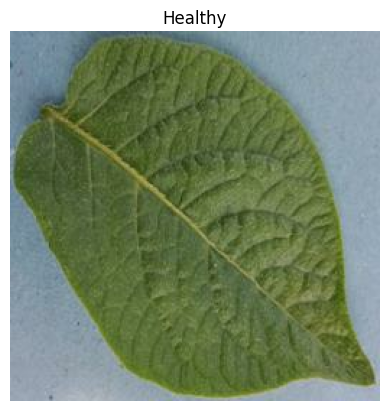

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(potato_classes[label_batch[0]])
    plt.axis("off")

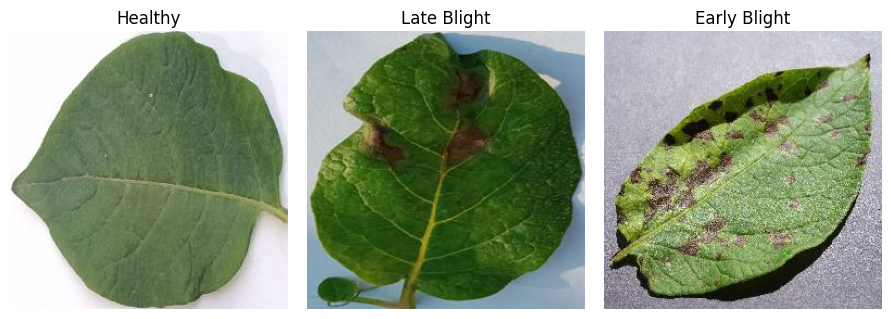

In [ ]:
# Extract class names from the dataset
class_names = dataset.class_names

# Prepare to display one image per class
plt.figure(figsize=(15, 15))

# Dictionary to store the first image path per class
class_first_image_paths = {}

# Iterate over the dataset to find and display the first image from each class
for images, labels in dataset:
    for image, label in zip(images, labels):
        class_name = class_names[label.numpy()]  # Get the class name from the label
        if class_name not in class_first_image_paths:
            # Store the path of the first image encountered for this class
            class_first_image_paths[class_name] = image
            # Display the first image found for this class
            plt.subplot(5, 5, len(class_first_image_paths))  # Adjust subplot position dynamically
            plt.imshow(image.numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")

        # Break loop if we have found one image per class
        if len(class_first_image_paths) == len(class_names):
            break

    # Break outer loop if we have found one image per class
    if len(class_first_image_paths) == len(class_names):
        break

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

In [ ]:
pip install keras-tuner


In [ ]:
# Step 2: Split the dataset
def get_dataset_partitions_tf(ds, train_split=0.6, val_split=0.1, test_split=0.3, shuffle=True, shuffle_size=10000):
    ds_size = sum(1 for _ in ds)  # Calculate dataset size
    assert train_split + val_split + test_split == 1.0, "Splits must sum to 1.0"

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_data_s = ds.take(train_size)
    val_data_s = ds.skip(train_size).take(val_size)
    test_data_s = ds.skip(train_size + val_size)

    return train_data_s, val_data_s, test_data_s

# Step 3: Split the dataset
train_data_s, val_data_s, test_data_s = get_dataset_partitions_tf(dataset)


In [ ]:
len(train_data_s)

56

In [ ]:
len(val_data_s)

9

In [ ]:
len(test_data_s)

29

In [ ]:
train_data_s = train_data_s.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data_s = val_data_s.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data_s = test_data_s.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.models.Sequential()

    # Input Preprocessing
    model.add(layers.Resizing(256, 256))
    model.add(layers.Rescaling(1./255))

    # First Convolutional Block
    model.add(layers.Conv2D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(256, 256, 3)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Block
    model.add(layers.Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    # Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))

    # Dropout for Regularization
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(layers.Dense(3, activation='softmax'))

    # Optimizer with Tuned Learning Rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning_dir',
    project_name='potato_disease_tuning'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
import multiprocessing
import time

# Define EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Tuner Configuration
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=8,                # Reduce to limit search space
    executions_per_trial=2,      # Each trial runs twice for stability
    directory='tuning_dir',
    project_name='potato_disease_tuning'
)

def run_tuner(tuner):
    tuner.search(
        train_data_s,
        epochs=20,
        validation_data=val_data_s,
        callbacks=[early_stopping]
    )

# Timeout Wrapper Function
def run_with_timeout(tuner, timeout_seconds=600):  # Example: 10-minute limit
    process = multiprocessing.Process(target=run_tuner, args=(tuner,))
    process.start()
    process.join(timeout=timeout_seconds)

    if process.is_alive():
        process.terminate()
        process.join()
        print("⏰ Tuning process stopped due to timeout.")

# Run Tuning with Timeout
run_with_timeout(tuner, timeout_seconds=600)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |filters_1
5                 |5                 |kernel_size_1
96                |96                |filters_2
5                 |5                 |kernel_size_2
128               |128               |dense_units
0.2               |0.2               |dropout_rate
0.00021817        |0.00021817        |learning_rate

Epoch 1/20
⏰ Tuning process stopped due to timeout.


In [ ]:
# best_hps = tuner.get_best_hyperparameters()[0]
# print(best_hps.values)

In [ ]:
# best_hps = tuner.get_best_hyperparameters()[0]
# print("Best Hyperparameters:")
# print(f"Filters 1: {best_hps.get('filters_1')}")
# print(f"Kernel Size 1: {best_hps.get('kernel_size_1')}")
# print(f"Learning Rate: {best_hps.get('learning_rate')}")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Define constants
IMAGE_SIZE = 256  # Example value, adjust as needed
CHANNELS = 3      # For RGB images
BATCH_SIZE = 32   # Example value, adjust as needed
n_classes = 21


In [ ]:
# ✅ Corrected preprocessing pipeline
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize images
    layers.Rescaling(1.0 / 255)               # Rescale pixel values to [0, 1]
])

# Define input shape (without batch size)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Build the model
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [ ]:
import tensorflow as tf

# Define the input shape based on your data
height, width, channels = 256, 256, 3  # Replace with your actual image dimensions

# Ensure model is built and initialized
model.build(input_shape=(None, height, width, channels))  # Replace with your input shape

# Assuming your model is already defined
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use this for integer labels
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # Wait for 5 epochs without improvement
    restore_best_weights=True
)

history = model.fit(
    train_data_s,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_data_s,
    callbacks=[early_stopping]
)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.4355 - loss: 1.4754 - val_accuracy: 0.6181 - val_loss: 0.6207
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6789 - loss: 0.5840 - val_accuracy: 0.8021 - val_loss: 0.5023
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7719 - loss: 0.4475 - val_accuracy: 0.8438 - val_loss: 0.3599
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8411 - loss: 0.3480 - val_accuracy: 0.9097 - val_loss: 0.2519
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.9045 - loss: 0.2561 - val_accuracy: 0.9097 - val_loss: 0.2150
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9084 - loss: 0.2224 - val_accuracy: 0.9583 - val_loss: 0.1338
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.9051 - loss: 0.2590 - val_accuracy: 0.9653 - val_loss: 0.1147
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9602 - loss: 0.1244 - val_accuracy: 0.9583 - v

In [ ]:
import datetime
# Print current date and time
currentDT = datetime.datetime.now()
print(currentDT)

2025-03-11 18:36:24.841237


In [ ]:
# Save the model
model_version = "CNN-V1"
model.save(f"/content/drive/MyDrive/Dataset/Potato_Model_{model_version}.keras")

# Evaluate the model
scores = model.evaluate(test_data_s)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 772ms/step - accuracy: 0.9853 - loss: 0.0401
Test Loss: 0.041981473565101624
Test Accuracy: 0.9881465435028076


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
scores = model.evaluate(test_data_s)
scores

29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 727ms/step - accuracy: 0.9909 - loss: 0.0423


[0.041981473565101624, 0.9881465435028076]

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 56}

In [ ]:
history.history['accuracy']

[0.540919303894043,
 0.6939461827278137,
 0.790919303894043,
 0.8458520174026489,
 0.9114349484443665,
 0.9187219738960266,
 0.9192824959754944,
 0.9596412777900696,
 0.9686098694801331,
 0.9708520174026489,
 0.9809417128562927,
 0.9893497824668884,
 0.9854260087013245,
 0.9781390428543091,
 0.9691703915596008,
 0.9792600870132446]

In [ ]:
acc=history.history['accuracy']
vali_acc=history.history['val_accuracy']
loss=history.history['loss']
vali_loss=history.history['val_loss']

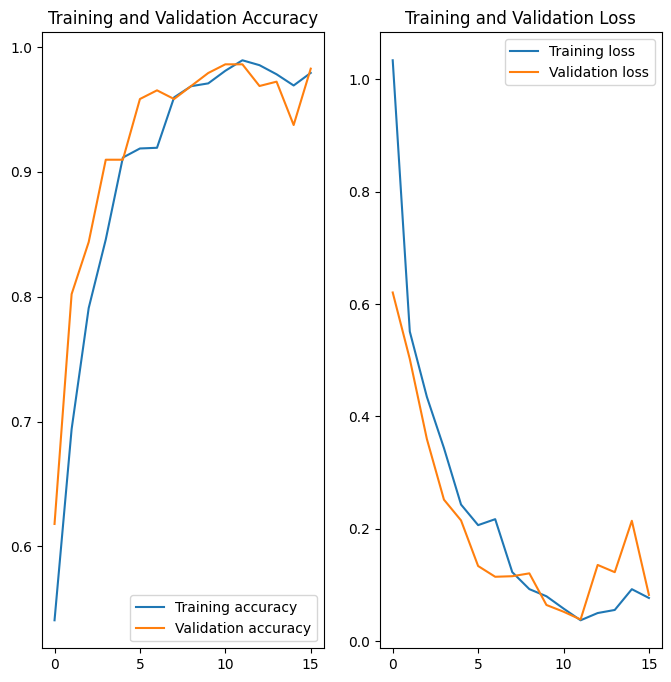

In [ ]:
import matplotlib.pyplot as plt

# Get the actual number of epochs trained
num_epochs_trained = len(acc)  # Or use len(history.history['accuracy'])

# Plot the results
plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs_trained), acc, label='Training accuracy')
plt.plot(range(num_epochs_trained), vali_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs_trained), loss, label='Training loss')
plt.plot(range(num_epochs_trained), vali_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

First image to predict:


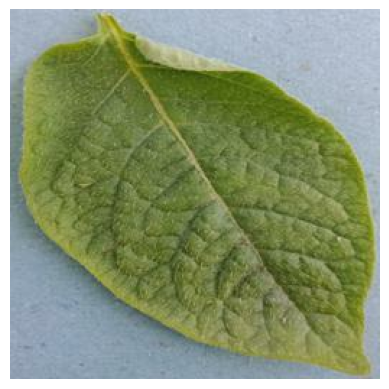

Actual label: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted label: Healthy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Ensure class names variable is correct
potato_class_names = dataset.class_names  # Use the correct variable

# ✅ Make predictions on a batch of test images
for images_batch, labels_batch in test_data_s.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")  # Hide axes for better display
    plt.show()

    print("Actual label:", potato_class_names[first_label])

    # Make a batch prediction
    batch_prediction = model.predict(images_batch)

    # Get the predicted class index
    predicted_label = np.argmax(batch_prediction[0])

    print("Predicted label:", potato_class_names[predicted_label])


In [ ]:
def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions=model.predict(img_array)

    predicted_class= potato_class_names[numpy.argmax(predictions[0])]
    confidence = round(100*(numpy.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


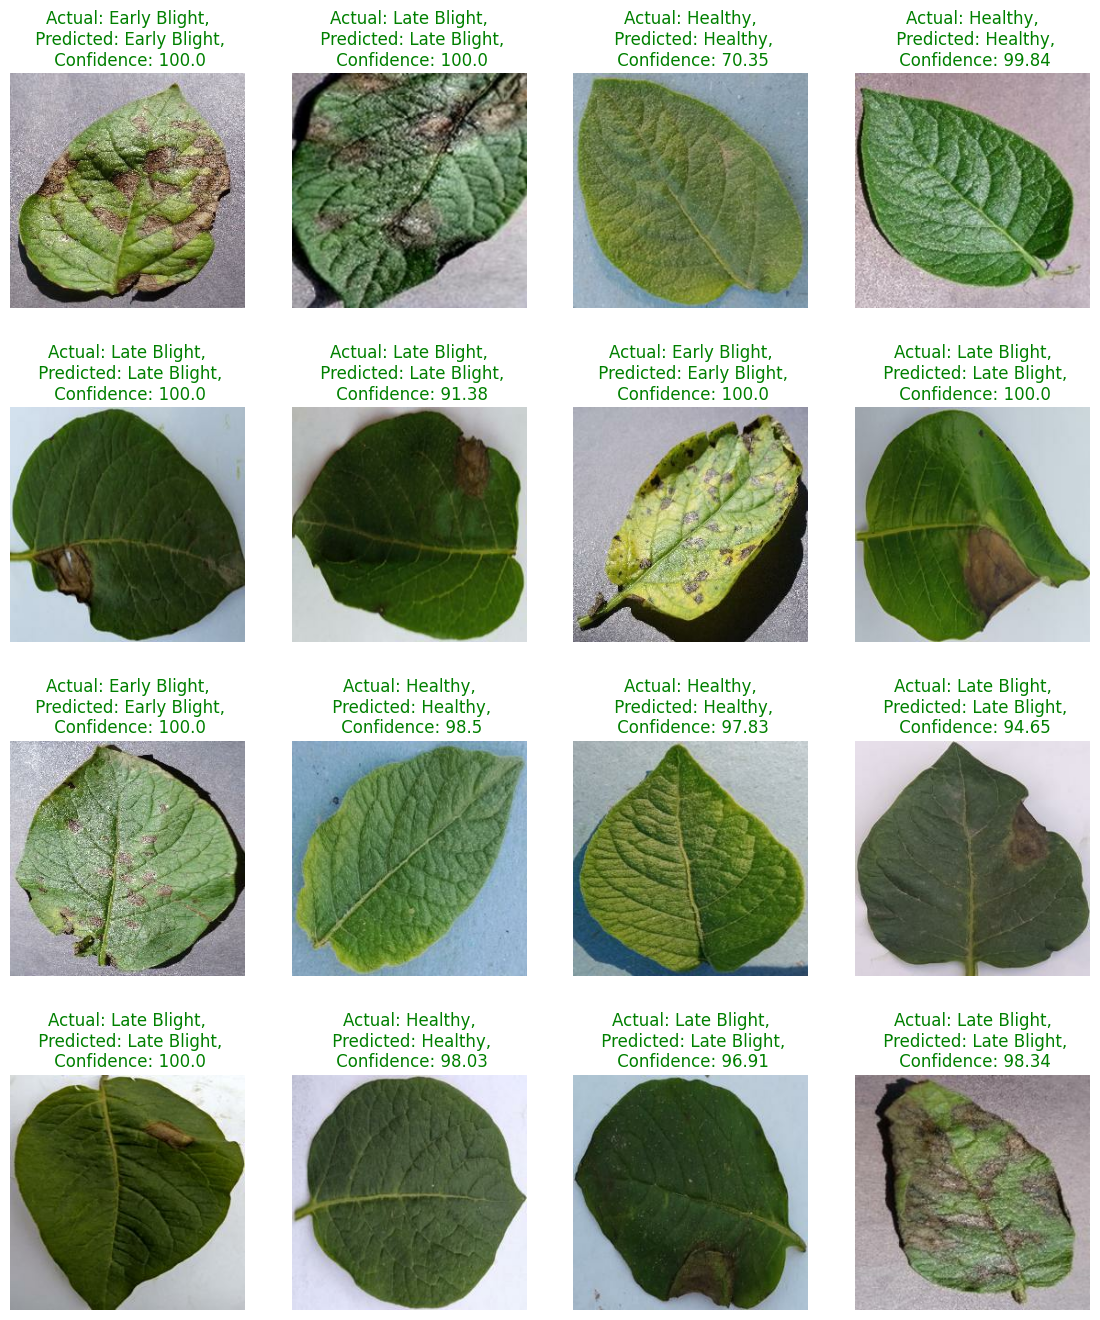

In [ ]:
plt.figure(figsize=(16, 16))
for images, labels in test_data_s.take(1):

    for i in range(16) :

        ax = plt.subplot(4, 4, i+1)
        plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class= potato_class_names[labels[i]]

        # plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")
        if actual_class == predicted_class:
            plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}", color='green')
        else:
            plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}", color='red')

        plt.axis("off")

In [ ]:
!pip install seaborn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

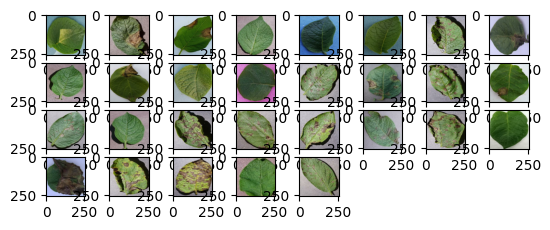

In [ ]:
y_pred = []
y_true = []
for images, labels in test_data_s:

    for i in range(len(test_data_s)) :

        ax = plt.subplot(8, 8, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=potato_class_names[labels[i]]
        y_pred.append(predicted_class)
        y_true.append(actual_class)

In [ ]:
y_true

In [ ]:
y_pred

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# assume y_true and y_pred are the true labels and predicted labels, respectively
cm = confusion_matrix(y_true, y_pred)

# define class names
landuse_class_names =['Early Blight',
 'Late Blight',
 'Healthy',]
# create heatmap with labeled axes
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# set labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


In [ ]:
cm

In [ ]:
num_classes = 3  # classes
precision = []
recall = []

for i in range(num_classes):
    tp = cm[i, i]  # True positives for class i
    fp = sum(cm[:, i]) - tp  # False positives for class i
    fn = sum(cm[i, :]) - tp  # False negatives for class i

    # Calculate precision (p) and recall (r) for class i
    p = tp / (tp + fp) if (tp + fp) > 0 else 0.0  # Handle division by zero
    r = tp / (tp + fn) if (tp + fn) > 0 else 0.0  # Handle division by zero

    # Append precision and recall to respective lists
    precision.append(p)
    recall.append(r)

print("Precision:", precision)
print("Recall:", recall)


In [ ]:
# calculate precision and recall for each class
num_classes = 3
precision = []
recall = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    fn = sum(cm[i, :]) - tp
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    precision.append(p)
    recall.append(r)

print("Precision:", precision)
print("Recall:", recall)


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')


In [ ]:
from sklearn.metrics import classification_report

# get the classification report, which includes F1 score for each class
report = classification_report(y_true, y_pred)

# print the classification report
print(report)


**SAVING MODEL**

In [ ]:
import os
from tensorflow.keras.models import load_model

# Define the save path
save_path = "/content/drive/MyDrive//CNN.h5"

# ✅ Ensure the directory exists before saving
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the model
model.save(save_path)

print(f"✅ Model saved successfully at: {save_path}")


In [ ]:
import numpy as np

# Assuming batch_prediction is the output of your model for a single image
predicted_class_index = np.argmax(batch_prediction[0])  # Get the index of the highest probability
predicted_class_name = potato_class_names[predicted_class_index]  # Get the class name

print("Predicted class:", predicted_class_name)  # Output the human-readable prediction

**EXPLAINABILITY FOR LIME**

In [ ]:
! pip install lime

In [ ]:
# import all of the necessary libraries
import lime
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
# generate the LIME explanation
explainer = lime_image.LimeImageExplainer()
# Define a predict_proba function for your model
def predict_proba(images):
    # Make predictions with your model
    preds = model.predict(images)
    # Return the predicted probabilities
    return preds

def my_explain_instance(image):
  # Generate an explanation for the test image
  explanation = explainer.explain_instance(
    image,
    predict_proba,
    top_labels=3,
    num_samples=1000,
    labels=(0, 1)
)
# Generate an explanation for the test image
explanation = explainer.explain_instance(
    first_image,
    predict_proba,
    top_labels=3,
    num_samples=1000,
    labels=(0, 1)
)

# Show the top labels for the test image
print('Top labels for test image:')
for label in explanation.top_labels:
    print(label)

# Show the explanation for the top label
print('Explanation for top label:')
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=False
)


In [ ]:
# Visualize the resulting explanation
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Get the image and explanation as numpy arrays
image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(image)

In [ ]:
import numpy as np

# Assuming batch_prediction is the output of your model for a single image
predicted_class_index = np.argmax(batch_prediction[0])  # Get the index of the highest probability
predicted_class_name = potato_class_names[predicted_class_index]  # Get the class name

print("Predicted class:", predicted_class_name)  # Output the human-readable prediction

**SHAPLEY ADDIDITIVE EXPLAINABLILITY**

In [ ]:
!pip install shap

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def get_image_for_prediction(dataset, class_names, image_size=(250, 250)):
    # Get the first image and label from the dataset
    for images_batch, labels_batch in dataset.take(1):
        first_image = images_batch[0].numpy().astype('uint8')
        first_label = labels_batch[0].numpy()

        # Display the image and print the actual label
        plt.imshow(first_image)
        plt.show()
        print("Actual label:", class_names[first_label])

        # Preprocess the image for model input
        image = tf.image.convert_image_dtype(first_image, tf.float32)
        image = tf.image.resize_with_pad(image, target_height=image_size[0], target_width=image_size[1])
        image = tf.expand_dims(image, axis=0)  # Add batch dimension

        return image



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Potato_class_names = dataset.class_names

images_array = []  # Array to store the images

for images_batch, labels_batch in test_data_s.take(1):
    for i in range(20):  # Modify the range to specify the number of images you want
        image = images_batch[i].numpy().astype('uint8')
        label = labels_batch[i].numpy()

        print("Image to predict:", i+1)
        plt.imshow(image)
        plt.show()

        print("Actual label:", landuse_class_names[label])
        batch_prediction = model.predict(np.expand_dims(images_batch[i], axis=0))
        predicted_label = landuse_class_names[np.argmax(batch_prediction)]

        print("Predicted label:", predicted_label)
        images_array.append(image)

# images_array now contains the array of 5 images


In [ ]:
import shap
shap.initjs()
print(first_image.shape)
masker = shap.maskers.Image("inpaint_telea", first_image.shape)

explainer = shap.Explainer(model, masker, output_names=Potato_class_names)

explainer

In [ ]:
import shap
import numpy as np

# Convert list of images to a NumPy array
images_array = np.array(images_array)

# Get the correct number of output classes dynamically
num_classes = len(potato_class_names)  # Number of model output classes
output_indices = list(range(min(5, num_classes)))  # Top 5 outputs or total classes available

# Generate SHAP values
shap_values = explainer(images_array, outputs=output_indices)

# ✅ Ensure SHAP values are correctly formatted
if isinstance(shap_values, list):
    shap_values = np.array(shap_values)  # Convert list to NumPy array if needed

print("SHAP Values Shape:", shap_values.shape)

# ✅ Reshape SHAP values to match image dimensions
if shap_values.shape[-1] == num_classes:  # Ensure last dim is the number of classes
    shap_values = [shap_values[..., i] for i in range(num_classes)]  # Separate into class-wise explanations

# ✅ Display SHAP explanation for images
shap.image_plot(shap_values, images_array)


**GRADCAM EXPLAINER**

In [ ]:
!pip install tensorflow matplotlib
!pip install gradcam
!pip install tf-explain



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined your test dataset as test_data_s

# Get the first image and label from the test dataset
for images_batch, labels_batch in test_data_s.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    plt.show()

    print("Actual label:", landuse_class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("Predicted label:", landuse_class_names[np.argmax(batch_prediction[0])])

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    predicted_class = Disease_class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence

# Assuming you have defined Disease_class_names elsewhere


In [ ]:
# from tf_explain.core.grad_cam import GradCAM
# import tensorflow as tf

# # model = tf.keras.models.load_model('path_to_your_model.h5')

# # Load a sample image (or
# img = tf.keras.preprocessing.image.img_to_array(first_image)
# data = ([img], None)

# # Start explainer
# explainer = GradCAM()
# grid = explainer.explain(data, model, class_index=first_label, layer_name="conv2d_4")  # 281 is the tabby cat index in ImageNet

# # Save the visualization
# explainer.save(grid, ".", "grad_cam.png")


**visualizing regions that contribute to the most specfic prediction**

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Replace 'image_path' with the path to your saved GradCAM visualization image
# image_path = "grad_cam.png"

# # Load the image
# img = mpimg.imread(image_path)

# # Display the image
# plt.imshow(img)
# plt.axis('off')
# plt.show()
